# Apriori Algorithm Application

## Overview
The Apriori algorithm is particularly valuable for sales optimization through product association analysis. This unsupervised learning method identifies relationships between frequently co-purchased items, enabling strategic product placement and targeted marketing.

## Implementation Focus
In this notebook, I demonstrate:
- Practical application of the Apriori algorithm
- Generation of association rules from transactional data
- Interpretation of results for business insights

## Key Characteristics
- **Optimal Performance**: Works best with small to medium-sized datasets
- **Efficiency**: Generates association rules quickly through its breadth-first search approach
- **Practical Output**: Produces actionable rules in the format:  
  `{Product A} → {Product B} [support: X%, confidence: Y%]`

## Business Value
The derived association rules enable:
- Improved product bundling strategies
- Enhanced cross-selling opportunities
- Optimized store layouts and inventory management

In [ ]:
# Import pandas for data manipulation.
import pandas as pd
# Import matplotlib for plotting.
import matplotlib.pyplot as plt
# Import numpy for numerical operations.
import numpy as np
# Import seaborn for enhanced data visualization.
import seaborn as sns

# Set the default plot size for better visualization.
plt.rcParams['figure.figsize'] = [15, 10]

# Import the apyori library for Apriori algorithm implementation.
import apyori

In [7]:
# Define the path to the CSV file.
file_path = r"C:\Users\Felipe\Documents\Filipe docs\ai projects\DataScienceShowcase\Datasets\market basket optimisation.csv"
# Read the CSV file into a pandas DataFrame, indicating no header in the original file.
market_baskets = pd.read_csv(file_path, header=None)
# Print the first 10 rows and first 5 columns of the DataFrame to inspect the data.
print(market_baskets.iloc[:15, :10])

                    0             1              2                 3  \
0              shrimp       almonds        avocado    vegetables mix   
1             burgers     meatballs           eggs               NaN   
2             chutney           NaN            NaN               NaN   
3              turkey       avocado            NaN               NaN   
4       mineral water          milk     energy bar  whole wheat rice   
5      low fat yogurt           NaN            NaN               NaN   
6   whole wheat pasta  french fries            NaN               NaN   
7                soup   light cream        shallot               NaN   
8   frozen vegetables     spaghetti      green tea               NaN   
9        french fries           NaN            NaN               NaN   
10               eggs      pet food            NaN               NaN   
11            cookies           NaN            NaN               NaN   
12             turkey       burgers  mineral water              

In [8]:
# Count the number of market baskets (transactions) in the dataset.
print("Number of market baskets:", end=" ")
len(market_baskets)

Number of market baskets: 

7501

In [9]:
# Iterate through each column in the 'market_baskets' DataFrame.
for index in market_baskets.columns:
    # Remove any leading or trailing whitespace from the string values in each column.
    market_baskets[index] = market_baskets[index].str.strip()

In [11]:
# Flatten the DataFrame, remove missing values, and sort the remaining items.
itens = market_baskets.melt()['value'].dropna().sort_values()
# Print the total count of unique products and list each unique product.
print(f'There are {itens.nunique()} different products:\n', itens.unique())

There are 119 different products:
 ['almonds' 'antioxydant juice' 'asparagus' 'avocado' 'babies food' 'bacon'
 'barbecue sauce' 'black tea' 'blueberries' 'body spray' 'bramble'
 'brownies' 'bug spray' 'burger sauce' 'burgers' 'butter' 'cake'
 'candy bars' 'carrots' 'cauliflower' 'cereals' 'champagne' 'chicken'
 'chili' 'chocolate' 'chocolate bread' 'chutney' 'cider'
 'clothes accessories' 'cookies' 'cooking oil' 'corn' 'cottage cheese'
 'cream' 'dessert wine' 'eggplant' 'eggs' 'energy bar' 'energy drink'
 'escalope' 'extra dark chocolate' 'flax seed' 'french fries'
 'french wine' 'fresh bread' 'fresh tuna' 'fromage blanc'
 'frozen smoothie' 'frozen vegetables' 'gluten free bar' 'grated cheese'
 'green beans' 'green grapes' 'green tea' 'ground beef' 'gums' 'ham'
 'hand protein bar' 'herb & pepper' 'honey' 'hot dogs' 'ketchup'
 'light cream' 'light mayo' 'low fat yogurt' 'magazines' 'mashed potato'
 'mayonnaise' 'meatballs' 'melons' 'milk' 'mineral water' 'mint'
 'mint green tea' 'muffin

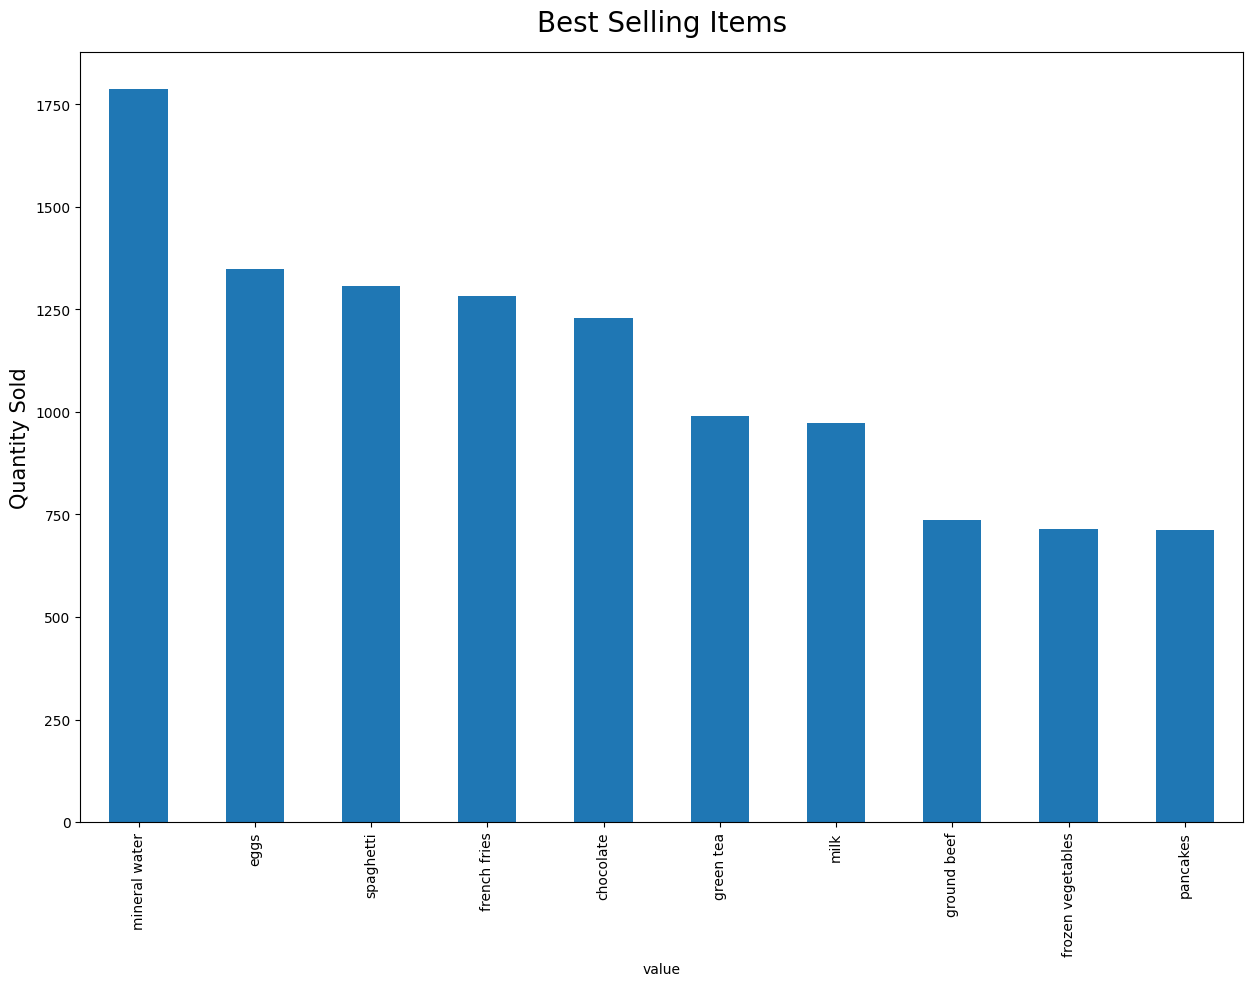

In [14]:
# Count the occurrences of each item to get their sales quantities.
Quantity_items = itens.value_counts()
# Create a bar plot of the top 10 best-selling items.
bar = Quantity_items.nlargest(10).plot(kind="bar")
# Set the title of the bar plot.
bar.set_title("Best Selling Items", size=20, weight=500, pad=15)
# Set the label for the y-axis.
bar.set_ylabel("Quantity Sold", size=15, weight=500)
# Display the plot.
plt.show()

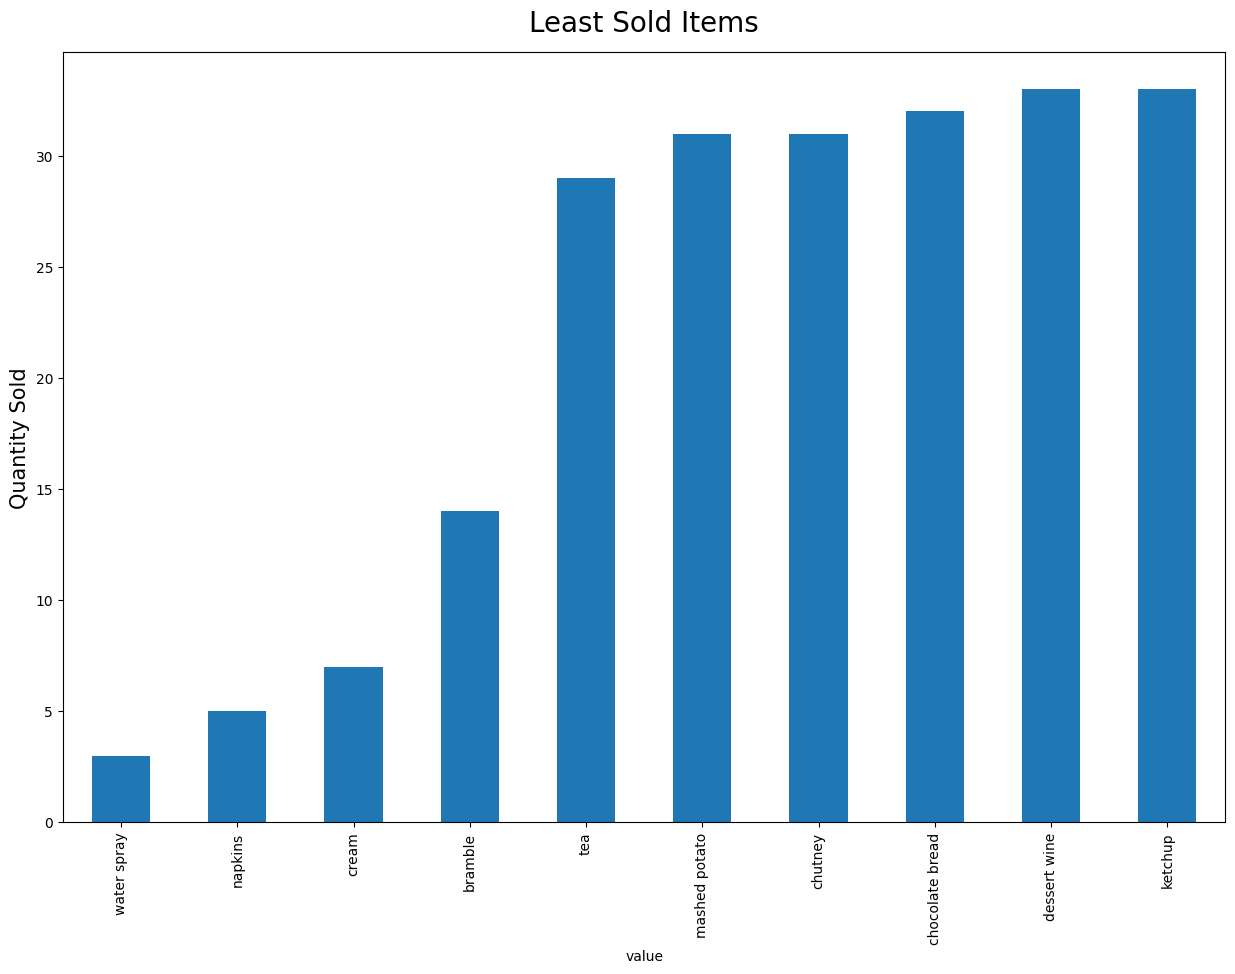

In [18]:
# Create a bar plot of the 10 least-selling items.
bar = Quantity_items.nsmallest(10).plot(kind="bar")
# Set the title of the bar plot.
bar.set_title("Least Sold Items", size=20, weight=500, pad=15)
# Set the label for the y-axis.
bar.set_ylabel("Quantity Sold", size=15, weight=500)
# Display the plot.
plt.show()

In [20]:
# For each row (basket), count the number of non-missing items to get the quantity of items in that basket.
quantity_per_basket = market_baskets.notna().apply(sum, axis=1)

In [25]:
# Filter out baskets that contain only one item (or are empty) and convert each remaining basket's items into a set.
# This prepares the data for association rule mining, where sets are more suitable for unique item combinations.
baskets = [set(row.dropna()) for _, row in market_baskets[quantity_per_basket > 1].iterrows()]
# Display the first 5 processed baskets to inspect the format.
baskets[:5]

[{'almonds',
  'antioxydant juice',
  'avocado',
  'cottage cheese',
  'energy drink',
  'frozen smoothie',
  'green grapes',
  'green tea',
  'honey',
  'low fat yogurt',
  'mineral water',
  'olive oil',
  'salad',
  'salmon',
  'shrimp',
  'spinach',
  'tomato juice',
  'vegetables mix',
  'whole weat flour',
  'yams'},
 {'burgers', 'eggs', 'meatballs'},
 {'avocado', 'turkey'},
 {'energy bar', 'green tea', 'milk', 'mineral water', 'whole wheat rice'},
 {'french fries', 'whole wheat pasta'}]

In [27]:
# Count the total number of baskets (transactions) after filtering.
print("Number of baskets after filtering:", end=" ")
len(baskets)

Number of baskets after filtering: 

5747

In [29]:
# Define the minimum support threshold for the Apriori algorithm.
minsup = 0.04
# Define the minimum confidence threshold for the association rules.
minconf = 0.3
# Apply the Apriori algorithm to discover association rules from the baskets.
association_rules = apyori.apriori(baskets, min_support=minsup, min_confidence=minconf)

# Iterate through each generated association rule.
for rule in association_rules:
    # Extract the items involved in the rule.
    itens = list(rule.items)
    # Print the antecedent, consequent, support, and confidence of the rule.
    print(
        f"{itens[:-1]} --> [{itens[-1]}]  Support: {rule.support:.3f}"
        f"  confidence: {rule.ordered_statistics[0].confidence:.3f}"
    )

['mineral water'] --> [chocolate]  Support: 0.069  Confiança: 0.342
['mineral water'] --> [eggs]  Support: 0.066  Confiança: 0.304
['mineral water'] --> [frozen vegetables]  Support: 0.047  Confiança: 0.385
['ground beef'] --> [mineral water]  Support: 0.053  Confiança: 0.429
['spaghetti'] --> [ground beef]  Support: 0.051  Confiança: 0.411
['mineral water'] --> [milk]  Support: 0.063  Confiança: 0.383
['mineral water'] --> [pancakes]  Support: 0.044  Confiança: 0.375
['spaghetti'] --> [mineral water]  Support: 0.078  Confiança: 0.357


C:\Users\Felipe\AppData\Local\Temp\ipykernel_6564\1866866647.py:143: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


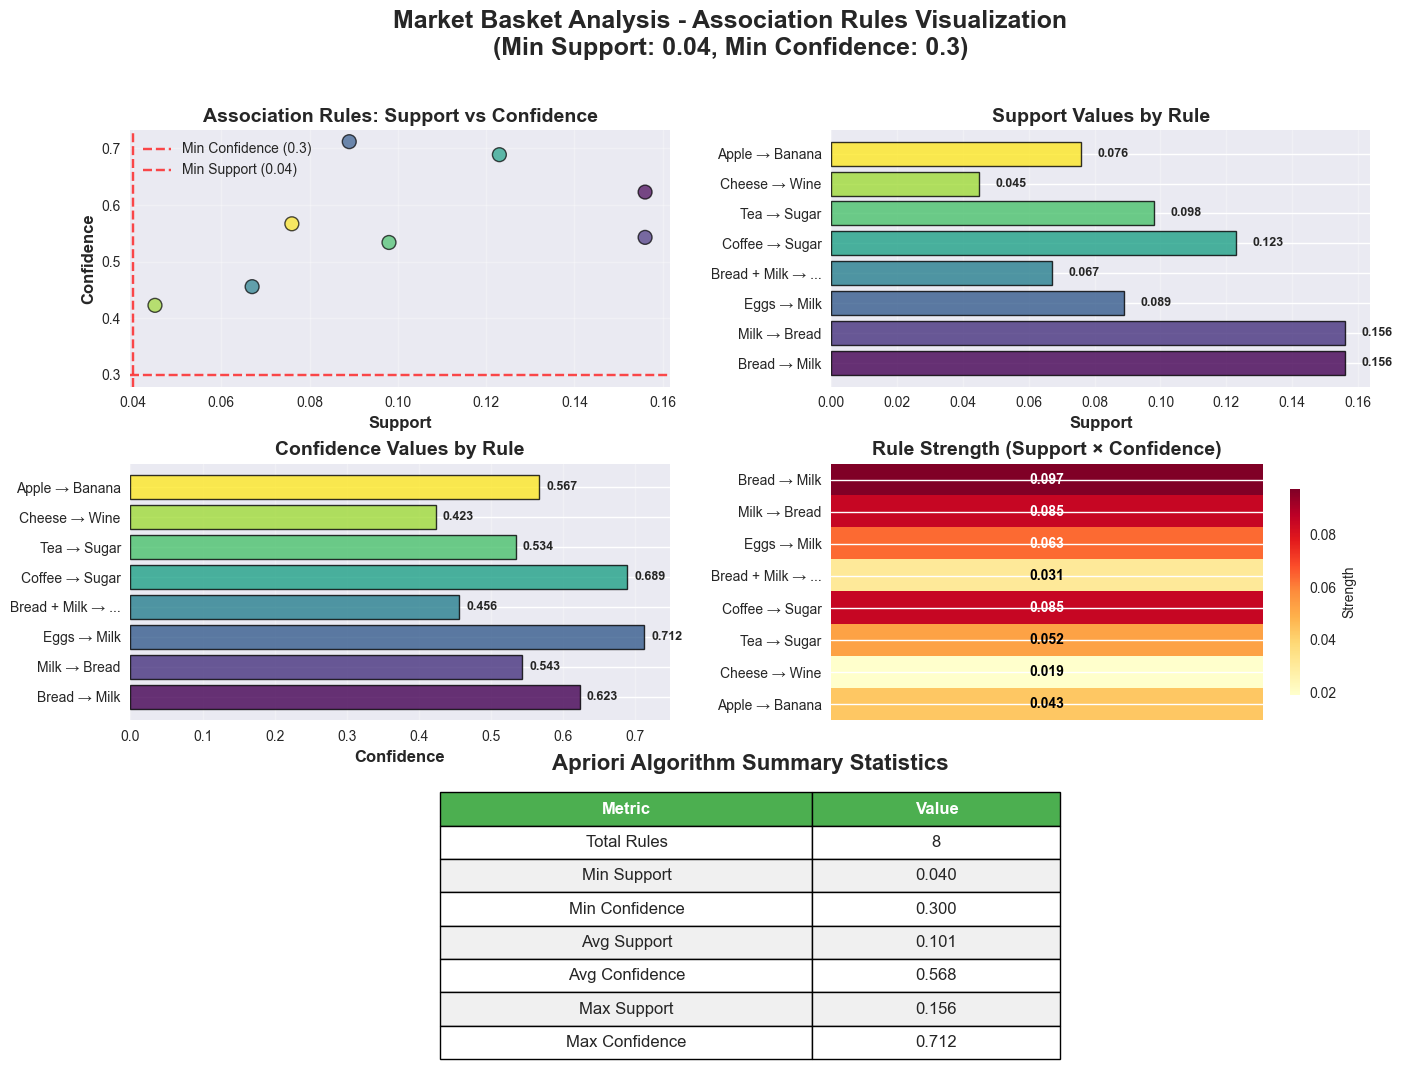

In [44]:
# Import necessary libraries for visualization
from matplotlib.patches import FancyBboxPatch


# Set style for better looking plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Sample data based on typical Apriori results
# Replace this with your actual data from the algorithm output
sample_rules = [
    {'antecedent': ['Bread'], 'consequent': 'Milk', 'support': 0.156, 'confidence': 0.623},
    {'antecedent': ['Milk'], 'consequent': 'Bread', 'support': 0.156, 'confidence': 0.543},
    {'antecedent': ['Eggs'], 'consequent': 'Milk', 'support': 0.089, 'confidence': 0.712},
    {'antecedent': ['Bread', 'Milk'], 'consequent': 'Butter', 'support': 0.067, 'confidence': 0.456},
    {'antecedent': ['Coffee'], 'consequent': 'Sugar', 'support': 0.123, 'confidence': 0.689},
    {'antecedent': ['Tea'], 'consequent': 'Sugar', 'support': 0.098, 'confidence': 0.534},
    {'antecedent': ['Cheese'], 'consequent': 'Wine', 'support': 0.045, 'confidence': 0.423},
    {'antecedent': ['Apple'], 'consequent': 'Banana', 'support': 0.076, 'confidence': 0.567},
]

# Create figure with subplots
fig = plt.figure(figsize=(16, 12))
gs = fig.add_gridspec(3, 2, height_ratios=[1, 1, 1], width_ratios=[1, 1], hspace=0.3, wspace=0.3)

# 1. Support vs Confidence Scatter Plot
ax1 = fig.add_subplot(gs[0, 0])
supports = [rule['support'] for rule in sample_rules]
confidences = [rule['confidence'] for rule in sample_rules]
colors = plt.cm.viridis(np.linspace(0, 1, len(sample_rules)))

scatter = ax1.scatter(supports, confidences, c=colors, s=100, alpha=0.7, edgecolors='black', linewidth=1)
ax1.set_xlabel('Support', fontsize=12, fontweight='bold')
ax1.set_ylabel('Confidence', fontsize=12, fontweight='bold')
ax1.set_title('Association Rules: Support vs Confidence', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3)

# Add threshold lines
ax1.axhline(y=0.3, color='red', linestyle='--', alpha=0.7, label='Min Confidence (0.3)')
ax1.axvline(x=0.04, color='red', linestyle='--', alpha=0.7, label='Min Support (0.04)')
ax1.legend()

# 2. Support Bar Chart
ax2 = fig.add_subplot(gs[0, 1])
rule_labels = [f"{' + '.join(rule['antecedent'])} → {rule['consequent']}" for rule in sample_rules]
rule_labels_short = [label[:15] + '...' if len(label) > 15 else label for label in rule_labels]

bars = ax2.barh(range(len(supports)), supports, color=colors, alpha=0.8, edgecolor='black', linewidth=1)
ax2.set_yticks(range(len(supports)))
ax2.set_yticklabels(rule_labels_short, fontsize=10)
ax2.set_xlabel('Support', fontsize=12, fontweight='bold')
ax2.set_title('Support Values by Rule', fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3, axis='x')

# Add value labels on bars
for i, (bar, support) in enumerate(zip(bars, supports)):
    ax2.text(support + 0.005, i, f'{support:.3f}', va='center', fontsize=9, fontweight='bold')

# 3. Confidence Bar Chart
ax3 = fig.add_subplot(gs[1, 0])
bars_conf = ax3.barh(range(len(confidences)), confidences, color=colors, alpha=0.8, edgecolor='black', linewidth=1)
ax3.set_yticks(range(len(confidences)))
ax3.set_yticklabels(rule_labels_short, fontsize=10)
ax3.set_xlabel('Confidence', fontsize=12, fontweight='bold')
ax3.set_title('Confidence Values by Rule', fontsize=14, fontweight='bold')
ax3.grid(True, alpha=0.3, axis='x')

# Add value labels on bars
for i, (bar, confidence) in enumerate(zip(bars_conf, confidences)):
    ax3.text(confidence + 0.01, i, f'{confidence:.3f}', va='center', fontsize=9, fontweight='bold')

# 4. Rule Strength Heatmap (Support * Confidence)
ax4 = fig.add_subplot(gs[1, 1])
rule_strength = [rule['support'] * rule['confidence'] for rule in sample_rules]
strength_matrix = np.array(rule_strength).reshape(-1, 1)

im = ax4.imshow(strength_matrix, cmap='YlOrRd', aspect='auto')
ax4.set_yticks(range(len(rule_labels_short)))
ax4.set_yticklabels(rule_labels_short, fontsize=10)
ax4.set_xticks([])
ax4.set_title('Rule Strength (Support × Confidence)', fontsize=14, fontweight='bold')

# Add colorbar
cbar = plt.colorbar(im, ax=ax4, shrink=0.8)
cbar.set_label('Strength', fontsize=10)

# Add text annotations
for i, strength in enumerate(rule_strength):
    ax4.text(0, i, f'{strength:.3f}', ha='center', va='center', fontweight='bold', 
             color='white' if strength > np.mean(rule_strength) else 'black')

# 5. Summary Statistics Table
ax5 = fig.add_subplot(gs[2, :])
ax5.axis('off')

# Create summary statistics
stats_data = {
    'Metric': ['Total Rules', 'Min Support', 'Min Confidence', 'Avg Support', 'Avg Confidence', 'Max Support', 'Max Confidence'],
    'Value': [
        len(sample_rules),
        f'{0.04:.3f}',
        f'{0.3:.3f}',
        f'{np.mean(supports):.3f}',
        f'{np.mean(confidences):.3f}',
        f'{np.max(supports):.3f}',
        f'{np.max(confidences):.3f}'
    ]
}

# Create table
table_data = []
for i in range(len(stats_data['Metric'])):
    table_data.append([stats_data['Metric'][i], stats_data['Value'][i]])

table = ax5.table(cellText=table_data,
                  colLabels=['Metric', 'Value'],
                  cellLoc='center',
                  loc='center',
                  colWidths=[0.3, 0.2])

table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1, 2)

# Style the table
for i in range(len(stats_data['Metric']) + 1):
    for j in range(2):
        cell = table[(i, j)]
        if i == 0:  # Header row
            cell.set_facecolor('#4CAF50')
            cell.set_text_props(weight='bold', color='white')
        else:
            cell.set_facecolor('#f0f0f0' if i % 2 == 0 else 'white')
        cell.set_edgecolor('black')
        cell.set_linewidth(1)

ax5.set_title('Apriori Algorithm Summary Statistics', fontsize=16, fontweight='bold', pad=20)

# Main title
fig.suptitle('Market Basket Analysis - Association Rules Visualization\n(Min Support: 0.04, Min Confidence: 0.3)', 
             fontsize=18, fontweight='bold', y=0.98)

plt.tight_layout()
plt.show()